In [12]:
%pip install seaborn matplotlib scikit-learn lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMClassifier, plot_importance

In [14]:
# Load data
data = pd.read_csv('../data engineering/reporting/promotion_report.csv')
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,65438,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,65141,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,7513,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,2542,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,48945,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...,...
54803,3030,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
54804,74592,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
54805,13918,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0
54806,13614,Noah Edwards,noah_edwards12@gmail.com,Sales & Marketing,29,2,0,10,NaN


In [15]:
data.isnull().sum()

employee_id              0
name                     0
email                    0
designation              0
age                      0
length_of_service        0
is_promoted              0
no_of_trainings          0
avg_training_score    2560
dtype: int64

In [16]:
# We have lots of data, specifically over 10000
# Therefore, I decided to drop rows contain NaN or Null
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,65438,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,65141,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,7513,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,2542,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,48945,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...,...
52243,6915,Quincy Thompson,quincy_thompson992@gmail.com,Sales & Marketing,31,2,0,10,49.0
52244,3030,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
52245,74592,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
52246,13918,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0


In [17]:
# 'emplye_id' column is unnecessary so, I gonna drop for it
data.drop(columns=['employee_id'], inplace=True)
data

,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...
52243,Quincy Thompson,quincy_thompson992@gmail.com,Sales & Marketing,31,2,0,10,49.0
52244,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
52245,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
52246,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0


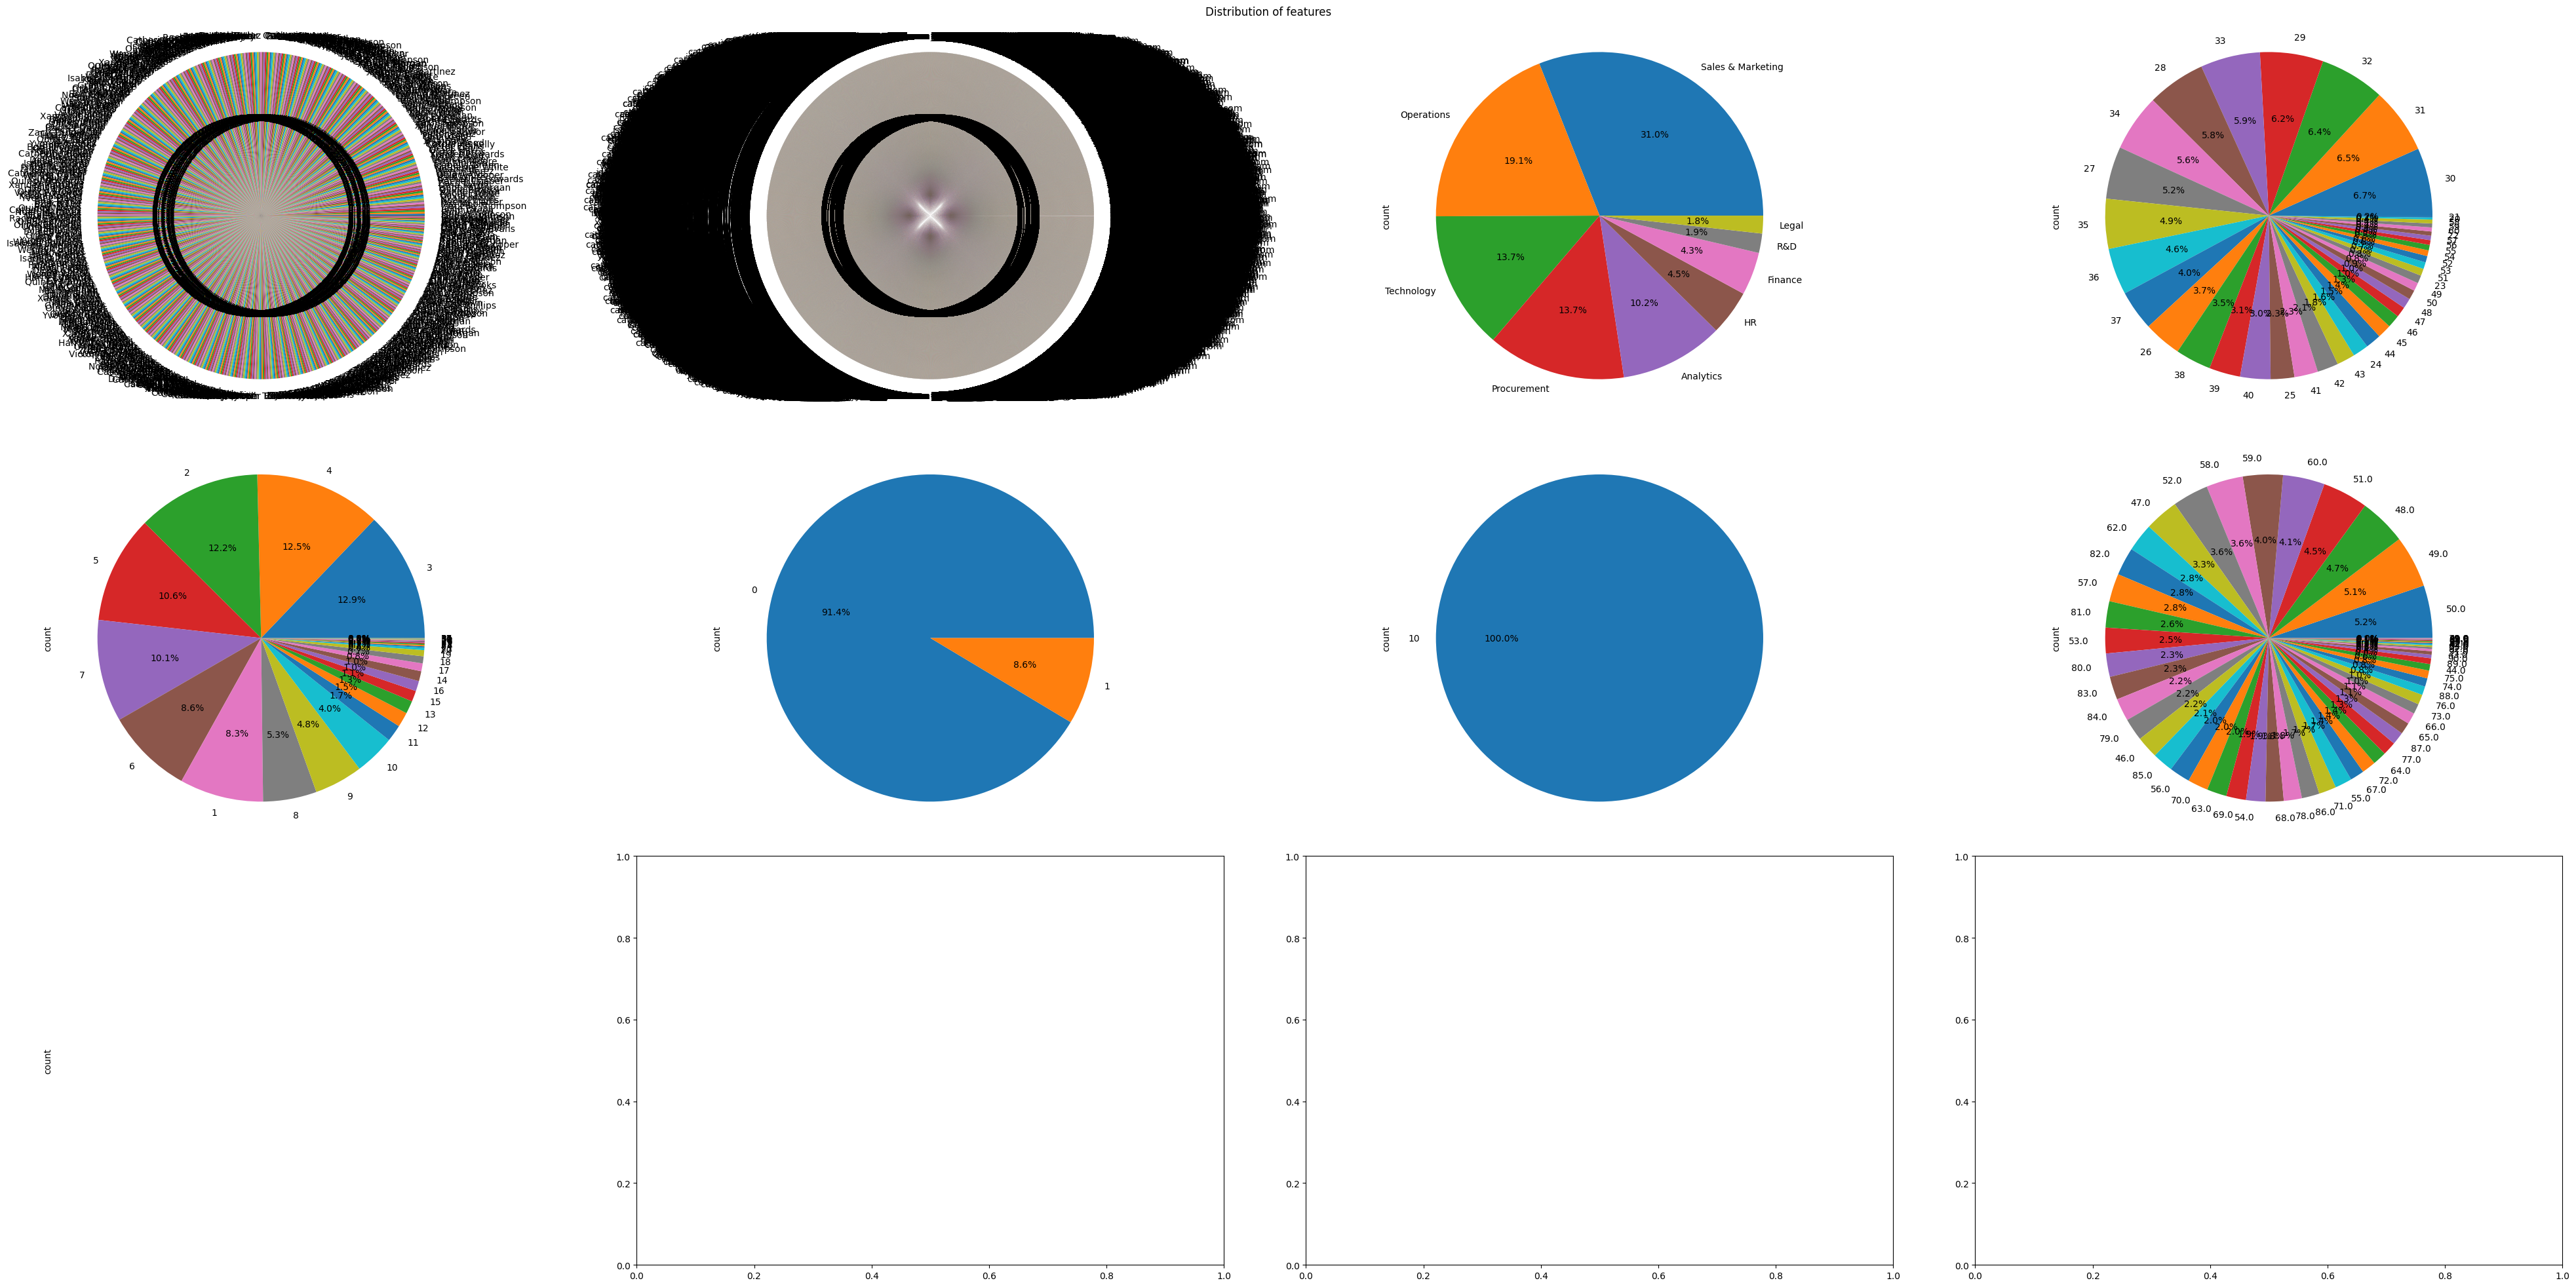

In [19]:
# Check distributions of features for training by pie charts
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(data.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(data.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

In [ ]:
# Check distributions of features contain numbers by distplot
columns = ['gender_new', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(data[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(data[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

In [ ]:
data

In [ ]:
# Log Transformation
age_log = np.log1p(data['age'])
service_log = np.log1p(data['length_of_service'])
score_log = np.log1p(data['avg_training_score'])

data.insert(6, 'age_log', age_log)
data.insert(9, 'length_of_service_log', service_log)
data.insert(12, 'avg_training_score_log', score_log)

data

In [ ]:
# Check distributions of log converted columns
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(data['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(data['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(data['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [ ]:
# Get One-Hot encoded DataFrame
data_oh = pd.get_dummies(data)
data_oh

In [ ]:
# Scaling of features
features = np.array(data_oh.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(data_oh[feature])
    data_oh[feature] = scaler.transform(data_oh[feature])

data_oh

In [ ]:
# Define features and label for training
train_features = data_oh.drop(columns=['is_promoted'], inplace=False)
train_label = data_oh['is_promoted'].astype(int)

In [ ]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

In [ ]:
# Utility Function
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))